### Exercise 1.

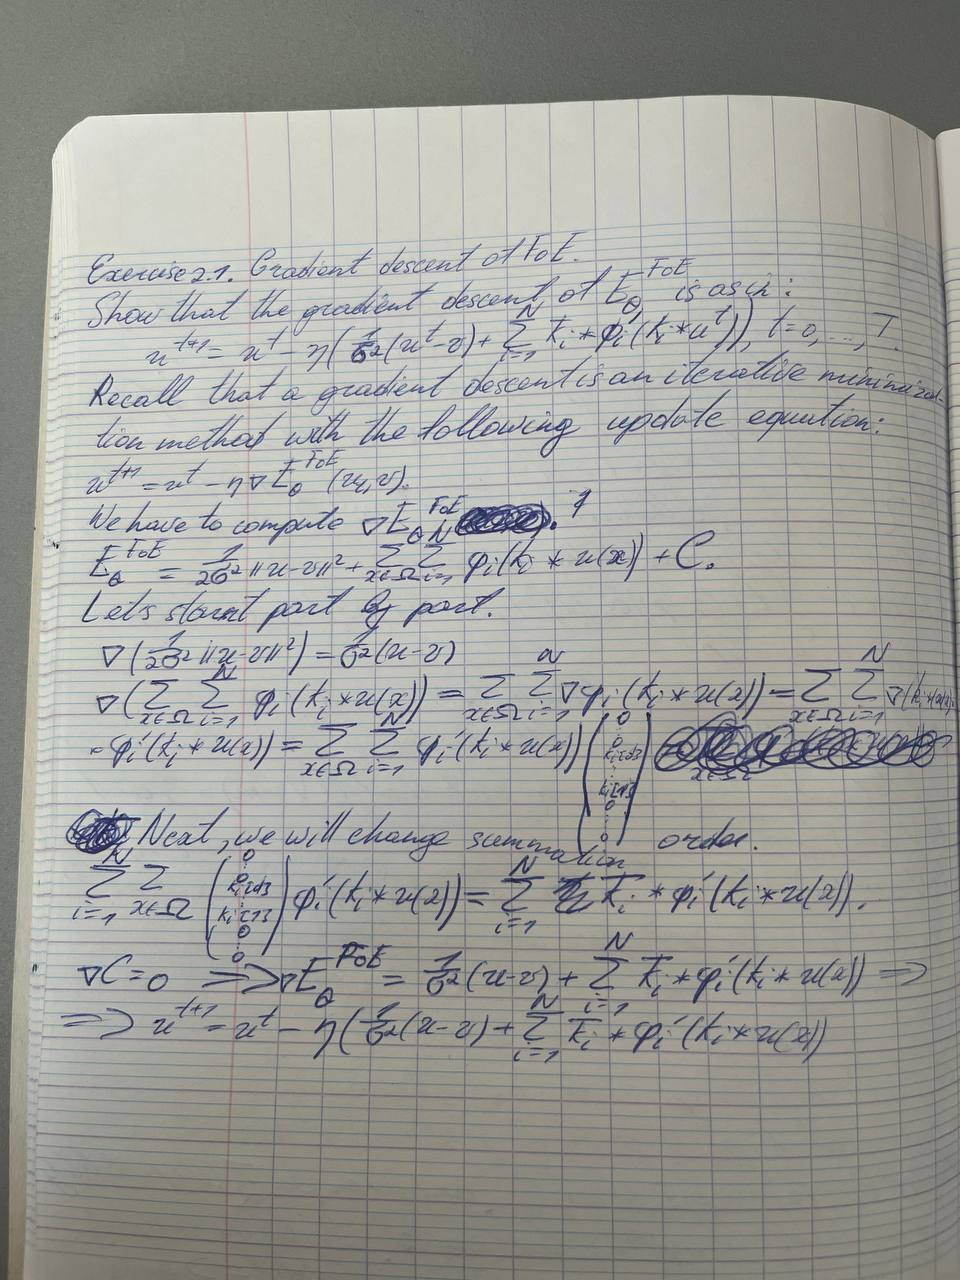

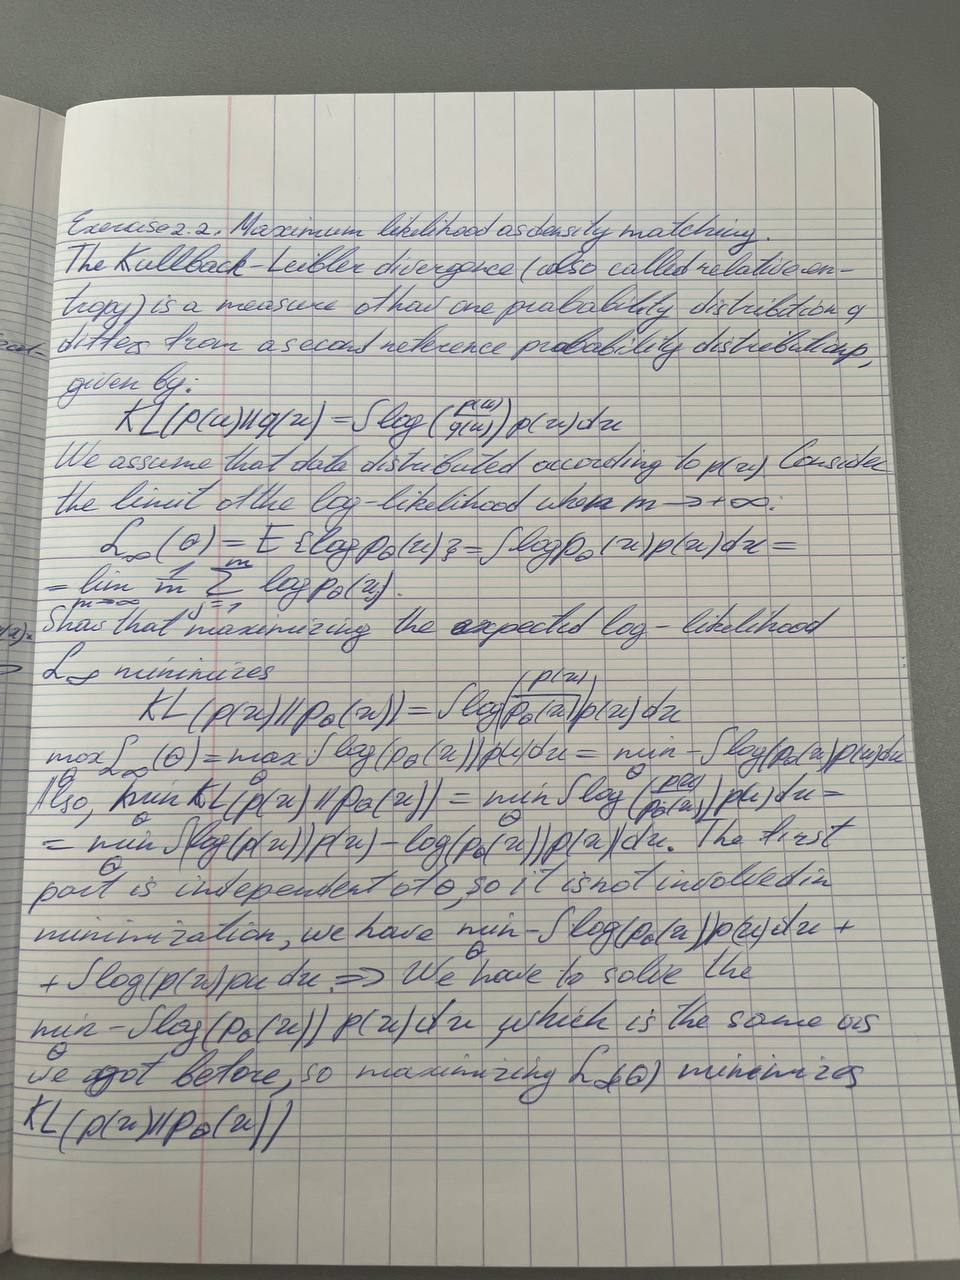

### Exercise 2.

Implement the barrier method to solve QP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def new_v(Q, p, v, t, diff_order_1, diff, t0):
    condition1 = t0*(np.dot(v.T, np.dot(Q, v)) + np.dot(p.T, v))
    for i in range(b.shape[0]):
      condition1 -= np.log(b[i]-np.dot(A[i], v))
    condition1 += alpha*t*np.dot(diff_order_1.T, diff)
    condition2 = t0*(np.dot((v + t*diff).T, np.dot(Q, v + t*diff)) + np.dot(p.T, v + t*diff))
    condition2 -= np.log(b[i]-np.dot(A[i], v + t*diff))
    if condition2 <= condition1 or ((b-A.dot(v+t*diff))>0).all():
        return v + t*diff
    else:
        while condition2 > condition1 and ((b-A.dot(v+t*diff))>0).all():
          t *= beta
          condition1 = t0*(np.dot(v.T, np.dot(Q, v)) + np.dot(p.T, v))
          for i in range(b.shape[0]):
            condition1 -= np.log(b[i]-np.dot(A[i], v))
          condition1 += alpha*t*np.dot(diff_order_1.T, diff)
          condition2 = t0*(np.dot((v + t*diff).T, np.dot(Q, v + t*diff)) + np.dot(p.T, v + t*diff))
          condition2 -= np.log(b[i]-np.dot(A[i], v + t*diff))
    return v + t*diff

def centering_step(Q, p, A, b, t, v0, eps):
    v_list = [v0.copy()]
    diff_order_1 = t*(2*np.dot(Q, v0) + p)
    diff_order_2 = 2*t*Q
    for i in range (b.shape[0]):
      diff_order_1 += A[i, np.newaxis].T/(b[i]-np.dot(A[i], v0))
      diff_order_2 += (np.outer(A[i, np.newaxis].T, A[i, np.newaxis].T)) / ((b[i] - np.dot(A[i], v0))**2)
    diff = -1*np.dot(np.linalg.inv(diff_order_2), diff_order_1)
    acc = np.dot(diff_order_1.T, np.dot(np.linalg.inv(diff_order_2), diff_order_1))
    if acc/2 <= eps: return v_list
    v1 = v0.copy()
    while acc/2 >= eps:
      v1 = new_v(Q, p, v1, t=1, diff_order_1=diff_order_1, diff=diff, t0=t)
      diff_order_1 = t*(2*np.dot(Q, v1) + p)
      diff_order_2 = 2*t*Q
      for i in range (b.shape[0]):
        diff_order_1 += A[i, np.newaxis].T/(b[i]-np.dot(A[i], v1))
        diff_order_2 += (np.outer(A[i, np.newaxis].T, A[i, np.newaxis].T)) / ((b[i] - np.dot(A[i], v1))**2)
      diff = -np.dot(np.linalg.inv(diff_order_2), diff_order_1)
      acc = np.dot(diff_order_1.T, np.dot(np.linalg.inv(diff_order_2), diff_order_1))
      v_list.append(v1)
    return v_list


def barr_method(Q, p, A, b, v0, eps, mu):
    t = 1
    n = 0
    n_list = [0]
    v_list = [v0]
    f_list = [(np.dot(v0.T, np.dot(Q, v0)) + np.dot(p.T, v0))[0][0]]
    while True:
      v_list1 = centering_step(Q, p, A, b, t, v0, eps)
      v_center, n1 = v_list1[-1], len(v_list1)
      n_list.append(n)
      n += n1
      v_list.append(v_center)
      f_list.append((np.dot(v_center.T, np.dot(Q, v_center)) + np.dot(p.T, v_center))[0][0])
      if b.shape[0]/t < eps:
          return v_list, n_list , f_list
      t = mu*t

### Exercise 3.
Test your function on randomly generated matrices X and observations y with λ = 10. Plot precision criterion and gap f(v_t)−f\* in semilog scale (using the best value found for f as a surrogate for f\*). Repeat for different values of the barrier method parameter μ = 2, 15, 50, 100, ... and check the impact on w.  What would be an appropriate choice for μ?

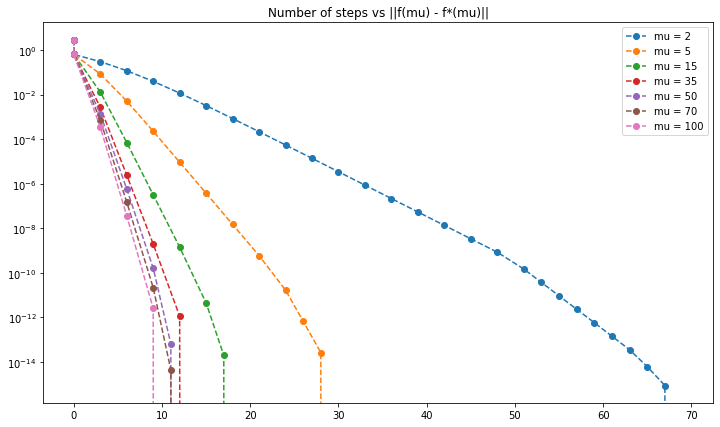

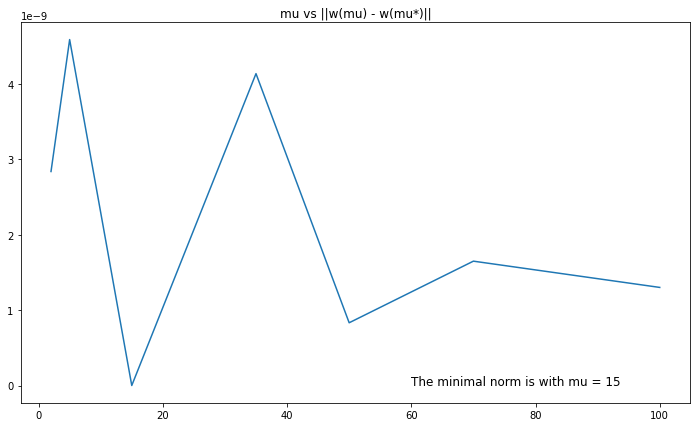

In [ ]:
alpha = 0.05
beta = 0.1
n = np.random.randint(low = 10, high=15)
d = np.random.randint(low = 15, high=20)
eps = 10e-7
lambda1 = 10
X = np.random.rand(n,d)
Q = 0.5*np.eye(n)
p = -np.random.rand(n,1)
A = np.vstack((X.T,-X.T))
b = lambda1*np.ones((2*d,1))
v0 = np.zeros((n,1))
mu_list = [2, 5, 15, 35, 50, 70, 100]
w_list = []
f1_list = []
plt.figure(figsize = (12, 7))
for mu in mu_list:
    result = barr_method(Q, p, A, b, v0, eps, mu)
    v = result[0][-1]
    v_list = result[0]
    n_list = result[1]
    f_list = result[2]
    w_list.append(np.linalg.lstsq(X,-v+p)[0])
    f1_list.append(f_list[-1])
    plt.plot(n_list, f_list - f_list[-1],  linestyle='--', marker='o', label='mu = {}'.format(mu))
plt.title("Number of steps vs ||f(mu) - f*(mu)||")
plt.semilogy()
plt.legend()
plt.show()
plt.figure(figsize = (12, 7))
w_norm = []
for w in w_list:
  w_norm.append(np.linalg.norm(w-w_list[np.argmin(f1_list)]))
plt.plot(mu_list, w_norm)
plt.text(x = 60, y = 0, s = "The minimal norm is with mu = {}".format(mu_list[np.argmin(np.array(w_norm))]), fontsize = 12)
plt.title("mu vs ||w(mu) - w(mu*)||")
plt.show()

The best mu that minimizes ||w(mu) - w(mu*)|| is mu = 15 and with mu = 100 we have fastest, but the norm is bigger than 0, so the best combination of minimazation of norm and speed is mu = 15.